## 1. Importar Bibliotecas

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from src.data.gtfs_loader import GTFSLoader

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 2. Carregar Dados

In [2]:
# Inicializar o GTFS Loader
loader = GTFSLoader(
    zip_path='../data/raw/GTFSBHTRANS.zip',
    output_dir='../data/processed/gtfs'
)

# Verificar se os arquivos parquet já existem
parquet_dir = Path('../data/processed/gtfs')
if not parquet_dir.exists() or not list(parquet_dir.glob('*.parquet')):
    print("Arquivos Parquet não encontrados. Convertendo...")
    gtfs_data = loader.load_all_files()
    parquet_paths = loader.convert_all_to_parquet()
else:
    print("✓ Arquivos Parquet já existem. Carregando diretamente...")

# Listar arquivos parquet disponíveis
print("\nArquivos GTFS disponíveis (formato Parquet):")
for parquet_file in sorted(parquet_dir.glob('*.parquet')):
    print(f"  - {parquet_file.stem}")

Arquivos Parquet não encontrados. Convertendo...
Loading 12 GTFS files from GTFSBHTRANS.zip...
----------------------------------------------------------------------
✓ Loaded feed_info.txt: 1 rows, 8 columns
✓ Loaded agency.txt: 2 rows, 7 columns
✓ Loaded stops.txt: 9917 rows, 13 columns
✓ Loaded calendar.txt: 6 rows, 11 columns
✓ Loaded calendar_dates.txt: 45 rows, 3 columns
✓ Loaded translations.txt: 6 rows, 5 columns
✓ Loaded routes.txt: 323 rows, 9 columns
✓ Loaded shapes.txt: 191075 rows, 5 columns
✓ Loaded stop_times.txt: 2953482 rows, 10 columns
✓ Loaded trips.txt: 51122 rows, 10 columns
✓ Loaded fare_rules.txt: 307 rows, 5 columns
✓ Loaded fare_attributes.txt: 3 rows, 7 columns
----------------------------------------------------------------------
Successfully loaded 12 files

Converting to Parquet format...
----------------------------------------------------------------------
✓ Converted feed_info.txt -> feed_info.parquet (1 rows, 8 columns)
✓ Converted agency.txt -> agency.p

In [3]:
# Escolher uma tabela para análise (exemplo: stops - paradas de ônibus)
# Opções: stops, routes, trips, stop_times, shapes, calendar, etc.
table_name = 'stops'

# Carregar do arquivo parquet
df = loader.load_parquet(table_name)

print(f"Tabela: {table_name}")
print(f"Shape: {df.shape}")
print("\nPrimeiras linhas:")
df.head()

Tabela: stops
Shape: (9917, 13)

Primeiras linhas:


,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code
0,14784087,NaN,Avenida Horacio Terena Guimaraes 350,None,-19.826593,-44.007896,NaN,NaN,0,NaN,NaN,0,None
1,14784088,NaN,Avenida Brigadeiro Eduardo Gomes 2400,None,-19.895991,-44.010206,NaN,NaN,0,NaN,NaN,0,None
2,14784089,NaN,Avenida Nelio Cerqueira 884,None,-19.991894,-44.040281,NaN,NaN,0,NaN,NaN,0,None
3,14784090,NaN,Rua Professora Iracema Pimenta 40,None,-19.955375,-43.949909,NaN,NaN,0,NaN,NaN,0,None
4,14784091,NaN,"Rua Oeste, 519",None,-19.923378,-43.968266,NaN,NaN,0,NaN,NaN,0,None


### 2.2 Explorar Tabelas Individuais

Vamos explorar algumas das tabelas GTFS mais importantes.

In [4]:
# Carregar as principais tabelas
tables = {}
table_names = ['stops', 'routes', 'trips', 'stop_times', 'shapes']

for name in table_names:
    try:
        tables[name] = loader.load_parquet(name)
        print(f"✓ {name}: {len(tables[name]):,} registros")
    except Exception as e:
        print(f"✗ Erro ao carregar {name}: {e}")

# Resumo rápido
print("\n" + "="*50)
print("Resumo do Dataset GTFS BH Trans:")
print("="*50)
print(f"Paradas (stops): {len(tables['stops']):,}")
print(f"Rotas (routes): {len(tables['routes']):,}")
print(f"Viagens (trips): {len(tables['trips']):,}")
print(f"Horários (stop_times): {len(tables['stop_times']):,}")
print(f"Geometrias (shapes): {len(tables['shapes']):,}")

✓ stops: 9,917 registros
✓ routes: 323 registros
✓ trips: 51,122 registros
✓ stop_times: 2,953,482 registros
✓ shapes: 191,075 registros

Resumo do Dataset GTFS BH Trans:
Paradas (stops): 9,917
Rotas (routes): 323
Viagens (trips): 51,122
Horários (stop_times): 2,953,482
Geometrias (shapes): 191,075
✓ stop_times: 2,953,482 registros
✓ shapes: 191,075 registros

Resumo do Dataset GTFS BH Trans:
Paradas (stops): 9,917
Rotas (routes): 323
Viagens (trips): 51,122
Horários (stop_times): 2,953,482
Geometrias (shapes): 191,075


### 2.3 Visão Geral do Dataset GTFS

Vamos carregar e explorar as principais tabelas do GTFS para entender a estrutura dos dados de transporte público.

In [5]:
# Listar as tabelas GTFS disponíveis e seus tamanhos
import os

print("Tabelas GTFS disponíveis:\n")
print(f"{'Tabela':<20} {'Tamanho':<10}")
print("-" * 30)

for parquet_file in sorted(parquet_dir.glob('*.parquet')):
    size_mb = parquet_file.stat().st_size / (1024 * 1024)
    print(f"{parquet_file.stem:<20} {size_mb:>8.2f} MB")
    
print("\nTotal comprimido: ~19 MB (vs 223 MB em txt)")

Tabelas GTFS disponíveis:

Tabela               Tamanho   
------------------------------
agency                   0.01 MB
calendar                 0.01 MB
calendar_dates           0.00 MB
fare_attributes          0.00 MB
fare_rules               0.00 MB
feed_info                0.01 MB
routes                   0.01 MB
shapes                   1.56 MB
stop_times              16.59 MB
stops                    0.39 MB
translations             0.00 MB
trips                    0.40 MB

Total comprimido: ~19 MB (vs 223 MB em txt)


### 2.1 Carregar Dados Parquet

Agora vamos carregar os dados diretamente dos arquivos Parquet, que são muito mais eficientes que os arquivos txt originais.

## 3. Informações Gerais

In [6]:
# Informações sobre a tabela selecionada
print(f"Informações da tabela '{table_name}':")
df.info()

Informações da tabela 'stops':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9917 entries, 0 to 9916
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              9917 non-null   int64  
 1   stop_code            0 non-null      float64
 2   stop_name            9917 non-null   object 
 3   stop_desc            48 non-null     object 
 4   stop_lat             9917 non-null   float64
 5   stop_lon             9917 non-null   float64
 6   zone_id              0 non-null      float64
 7   stop_url             0 non-null      float64
 8   location_type        9917 non-null   int64  
 9   parent_station       271 non-null    float64
 10  stop_timezone        0 non-null      float64
 11  wheelchair_boarding  9917 non-null   int64  
 12  platform_code        267 non-null    object 
dtypes: float64(7), int64(3), object(3)
memory usage: 1007.3+ KB


In [7]:
# Estatísticas descritivas
df.describe()

,stop_id,stop_code,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
count,9.917000e+03,0.0,9917.000000,9917.000000,0.0,0.0,9917.000000,2.710000e+02,0.0,9917.000000
mean,1.498439e+07,NaN,-19.897575,-43.959843,NaN,NaN,0.005143,1.479009e+07,NaN,0.018957
std,1.301890e+06,NaN,0.057072,0.041680,NaN,NaN,0.075643,2.802720e+03,NaN,0.136381
min,1.478409e+07,NaN,-20.028445,-44.062273,NaN,NaN,0.000000,1.478431e+07,NaN,0.000000
25%,1.478660e+07,NaN,-19.938262,-43.992979,NaN,NaN,0.000000,1.478754e+07,NaN,0.000000
50%,1.478912e+07,NaN,-19.899391,-43.960961,NaN,NaN,0.000000,1.479168e+07,NaN,0.000000
75%,1.479163e+07,NaN,-19.850905,-43.927679,NaN,NaN,0.000000,1.479276e+07,NaN,0.000000
max,3.113030e+07,NaN,-19.776212,-43.862629,NaN,NaN,2.000000,1.479345e+07,NaN,1.000000


## 4. Análise de Valores Faltantes

In [8]:
# Verificar valores faltantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})

missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

,Missing Count,Percentage
stop_code,9917,100.000000
zone_id,9917,100.000000
stop_url,9917,100.000000
stop_timezone,9917,100.000000
stop_desc,9869,99.515983
platform_code,9650,97.307654
parent_station,9646,97.267319


## 5. Análise da Variável Target

In [9]:
# TODO: Ajustar para sua variável target
target_column = 'target'

if target_column in df.columns:
    # Distribuição da variável target
    print(df[target_column].value_counts())
    print(f"\nProporção:\n{df[target_column].value_counts(normalize=True)}")
    
    # Visualização
    plt.figure(figsize=(8, 5))
    df[target_column].value_counts().plot(kind='bar')
    plt.title('Distribuição da Variável Target')
    plt.xlabel(target_column)
    plt.ylabel('Contagem')
    plt.show()

## 6. Análise de Features Numéricas

Features numéricas: ['stop_id', 'stop_code', 'stop_lat', 'stop_lon', 'zone_id', 'stop_url', 'location_type', 'parent_station', 'stop_timezone', 'wheelchair_boarding']


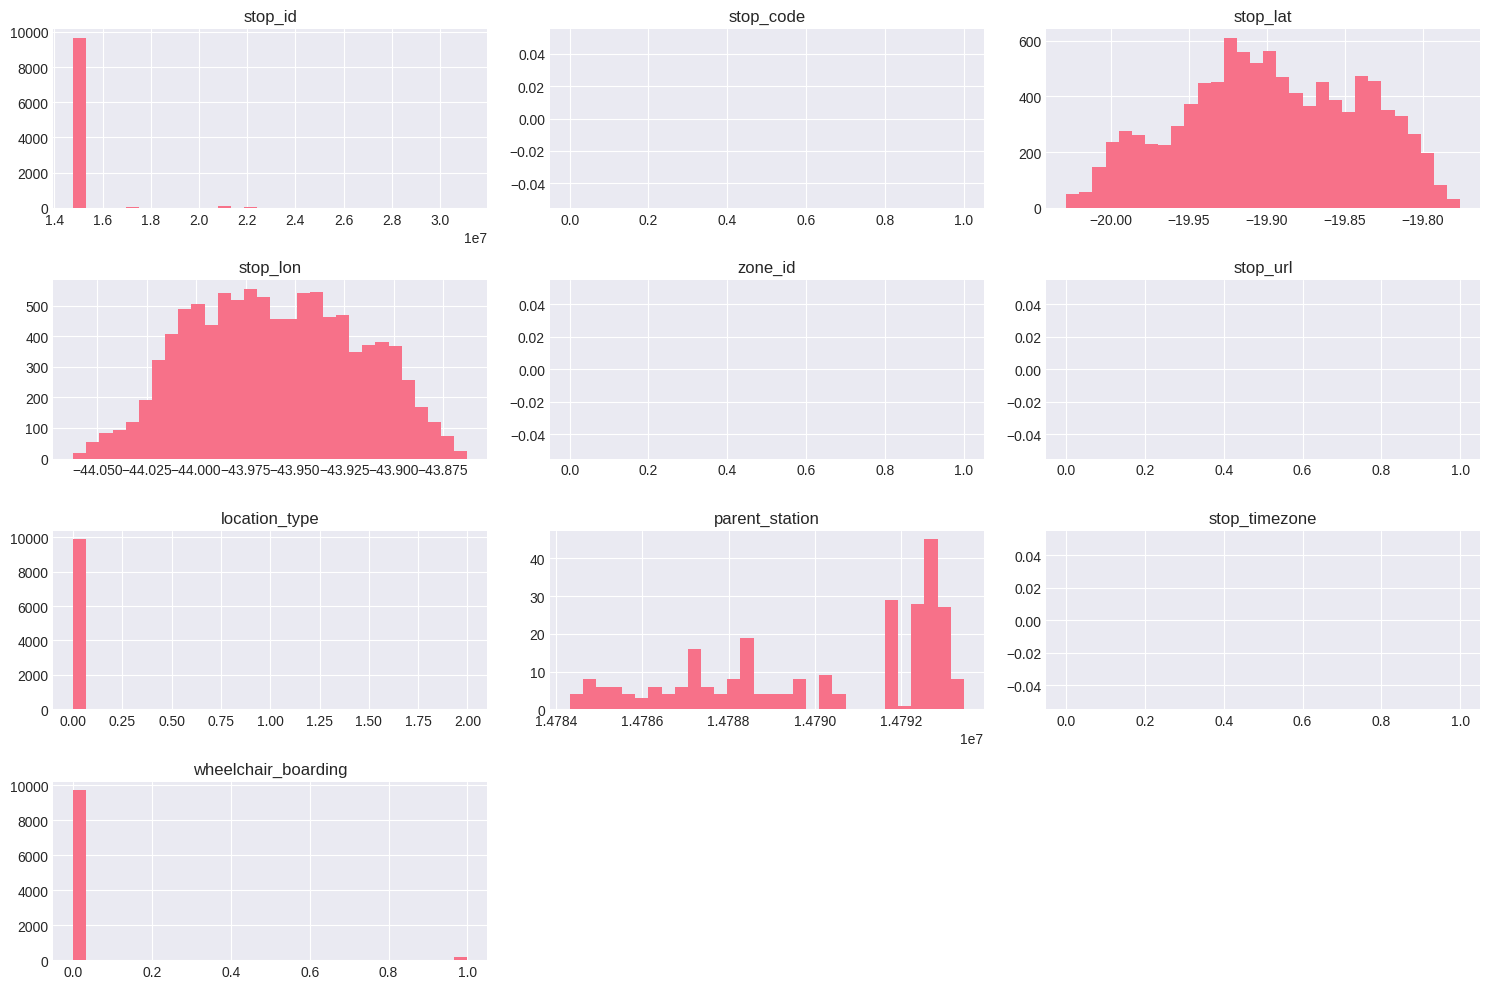

In [10]:
# Selecionar features numéricas
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Features numéricas: {numeric_features}")

# Distribuição das features numéricas
df[numeric_features].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

## 7. Matriz de Correlação

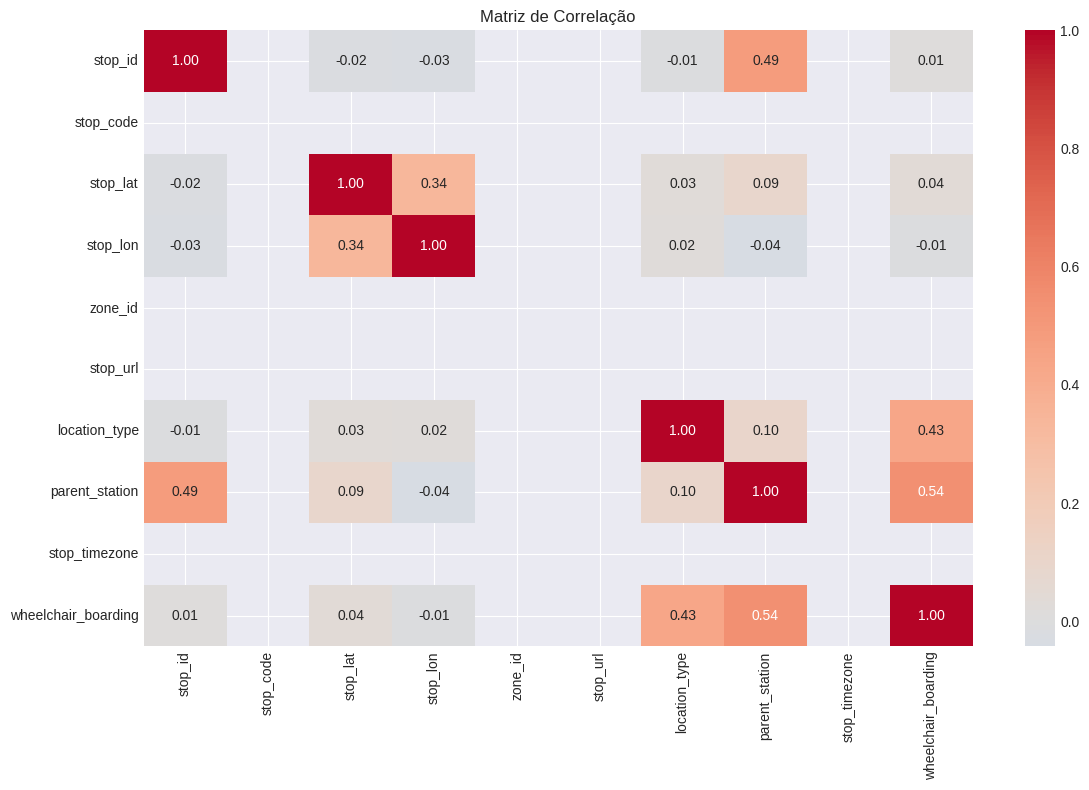

In [11]:
# Matriz de correlação
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

## 8. Análise de Features Categóricas

In [12]:
# Selecionar features categóricas
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"Features categóricas: {categorical_features}")

# Distribuição das features categóricas
for col in categorical_features[:5]:  # Limitar a 5 primeiras
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))

Features categóricas: ['stop_name', 'stop_desc', 'platform_code']

stop_name:
stop_name
Estação São Gabriel                    40
Rua Tres Mil Cento E Quarenta 11        2
Estação Diamante                        2
Estação Ponto São José                  2
Rua Carlos Lacerda, 1038                2
Estação Barreiro                        2
Avenida Cristiano Machado 4025          1
Rua Padre Agostinho 21                  1
Avenida Leontino Francisco Alves 12     1
Rua Jose Nelson Andre 417               1
Name: count, dtype: int64

stop_desc:
stop_desc
Praça da Savassi      5
Shopping Ponteio      2
Plataforma E1         2
Praça Hugo Werneck    1
Pltaforma G2          1
BH Shopping           1
Plataforma F4         1
Plataforma F3         1
Plataforma F2         1
Plataforma G3         1
Name: count, dtype: int64

platform_code:
platform_code
1B    36
1A    36
2B    24
2A    23
A3     6
A1     5
A2     5
C1     5
B1     5
B2     5
Name: count, dtype: int64


## 9. Detecção de Outliers

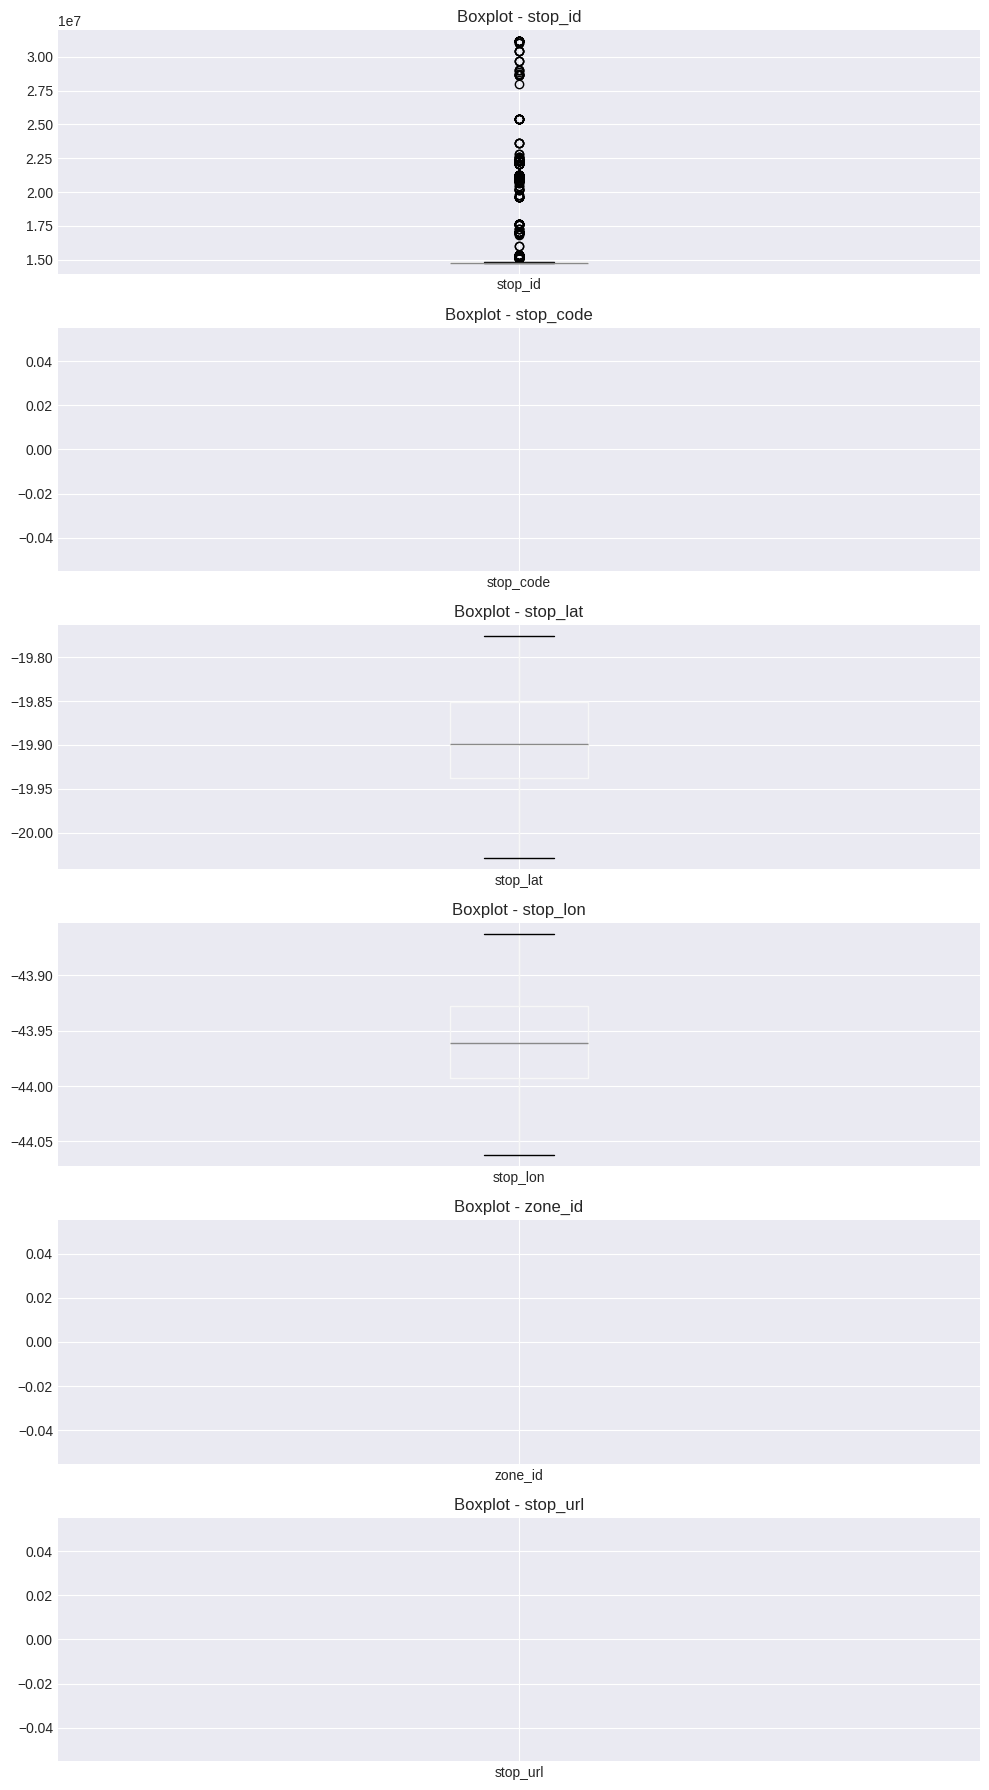

In [13]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(len(numeric_features[:6]), 1, figsize=(10, 3*len(numeric_features[:6])))

for idx, col in enumerate(numeric_features[:6]):
    if len(numeric_features[:6]) > 1:
        ax = axes[idx]
    else:
        ax = axes
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

## 10. Conclusões da Análise Exploratória

TODO: Adicionar suas conclusões aqui:
- Principais características do dataset
- Problemas identificados (valores faltantes, outliers, desbalanceamento)
- Próximos passos para pré-processamento